## Machine Learning

![](../img/machine_learning.png)

### causalimpact: Find Causal Relation of an Event and a Variable in Python	

In [ ]:
!pip install pycausalimpact

When working with time series data, you might want to determine whether an event has an impact on some response variable or not. For example, if your company creates an advertisement, you might want to track whether the advertisement results in an increase in sales or not.

That is when causalimpact comes in handy. causalimpact analyses the differences between expected and observed time series data. With causalimpact, you can infer the expected effect of an intervention in 3 lines of code.

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
import causalimpact
from causalimpact import CausalImpact

# Generate random sample

np.random.seed(0)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

X = 50 + arma_process.generate_sample(nsample=1000)
y = 1.6 * X + np.random.normal(size=1000)

# There is a change starting from index 800
y[800:] += 10

In [7]:
data = pd.DataFrame({"y": y, "X": X}, columns=["y", "X"])
pre_period = [0, 799]
post_period = [800, 999]

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    90.03              18006.16
Prediction (s.d.)         79.97 (0.3)        15994.43 (60.93)
95% CI                    [79.36, 80.55]     [15871.15, 16110.0]

Absolute effect (s.d.)    10.06 (0.3)        2011.72 (60.93)
95% CI                    [9.48, 10.68]      [1896.16, 2135.01]

Relative effect (s.d.)    12.58% (0.38%)     12.58% (0.38%)
95% CI                    [11.86%, 13.35%]   [11.86%, 13.35%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 90.03. By contrast, in the absence of an
intervention, we would have expected an average response of 79.97.
The 95% interval of this counterfactual prediction is [79.36, 80.55].
Subtracting this predictio

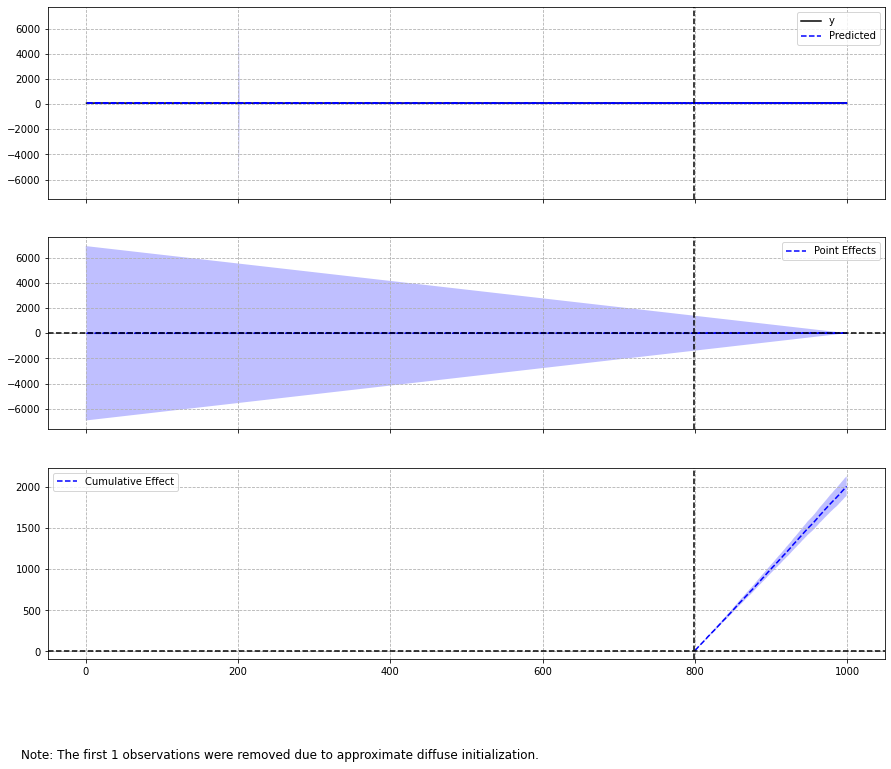

In [10]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output="report"))
ci.plot()

### Pipeline + GridSearchCV: Prevent Data Leakage when Scaling the Data

Scaling the data before using GridSearchCV can lead to data leakage since the scaling tells some information about the entire data. To prevent this, assemble both the scaler and machine learning models in a pipeline then use it as the estimator for GridSearchCV. 

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# load data
df = load_iris()
X = df.data
y = df.target

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a pipeline variable
make_pipe = make_pipeline(StandardScaler(), SVC())

# Defining parameters grid
grid_params = {"svc__C": [0.1, 1, 10, 100, 1000], "svc__gamma": [0.1, 1, 10, 100]}

# hypertuning
grid = GridSearchCV(make_pipe, grid_params, cv=5)
grid.fit(X_train, y_train)

# predict
y_pred = grid.predict(X_test)

<IPython.core.display.Javascript object>

The estimator is now the entire pipeline instead of just the machine learning model.

### squared=False: Get RMSE from Sklearn’s mean_squared_error method

If you want to get the root mean squared error using sklearn, pass `squared=False` to sklearn’s `mean_squared_error` method.

In [42]:
from sklearn.metrics import mean_squared_error

y_actual = [1, 2, 3]
y_predicted = [1.5, 2.5, 3.5]
rmse = mean_squared_error(y_actual, y_predicted, squared=False)
rmse

0.5

<IPython.core.display.Javascript object>

### modelkit: Build Production ML Systems in Python

In [ ]:
!pip install modelkit textblob 

If you want your ML models to be fast, type-safe, testable, and fast to deploy to production, try modelkit. modelkit allows you to incorporate all of these features into your model in several lines of code. 

In [6]:
from modelkit import ModelLibrary, Model 
from textblob import TextBlob, WordList
# import nltk
# nltk.download('brown')
# nltk.download('punkt')

To define a modelkit Model, you need to:

- create class inheriting from `modelkit.Model`
- implement a `_predict` method

In [24]:
class NounPhraseExtractor(Model):

    # Give model a name
    CONFIGURATIONS = {"noun_phrase_extractor": {}}

    def _predict(self, text):
        blob = TextBlob(text)
        return blob.noun_phrases

<IPython.core.display.Javascript object>

You can now instantiate and use the model:

In [25]:
noun_extractor = NounPhraseExtractor()
noun_extractor("What are your learning strategies?")

2021-11-05 09:55.55 [debug    ] Model loaded                   memory=0 Bytes memory_bytes=0 model_name=None time=0 microseconds time_s=4.232699939166196e-05


WordList(['learning strategies'])

<IPython.core.display.Javascript object>

You can also create test cases for your model and make sure all test cases are passed. 

In [26]:
class NounPhraseExtractor(Model):

    # Give model a name
    CONFIGURATIONS = {"noun_phrase_extractor": {}}

    TEST_CASES = [
        {"item": "There is a red apple on the tree", "result": WordList(["red apple"])}
    ]

    def _predict(self, text):
        blob = TextBlob(text)
        return blob.noun_phrases

<IPython.core.display.Javascript object>

In [27]:
noun_extractor = NounPhraseExtractor()
noun_extractor.test()

2021-11-05 09:55.58 [debug    ] Model loaded                   memory=0 Bytes memory_bytes=0 model_name=None time=0 microseconds time_s=4.3191997974645346e-05


TEST 1: SUCCESS

<IPython.core.display.Javascript object>

modelkit also allows you to organize a group of models using `ModelLibrary`.

In [18]:
class SentimentAnalyzer(Model):
    
    # Give model a name
    CONFIGURATIONS = {"sentiment_analyzer": {}}

    def _predict(self, text):
        blob = TextBlob(text)
        return blob.sentiment

In [19]:
nlp_models = ModelLibrary(models=[NounPhraseExtractor, SentimentAnalyzer])

2021-11-05 09:50.13 [info     ] Instantiating AssetsManager    lazy_loading=False
2021-11-05 09:50.13 [info     ] No remote storage provider configured
2021-11-05 09:50.13 [debug    ] Resolving asset for Model      model_name=sentiment_analyzer
2021-11-05 09:50.13 [debug    ] Loading model                  model_name=sentiment_analyzer
2021-11-05 09:50.13 [debug    ] Instantiating Model object     model_name=sentiment_analyzer
2021-11-05 09:50.13 [debug    ] Model loaded                   memory=0 Bytes memory_bytes=0 model_name=sentiment_analyzer time=0 microseconds time_s=3.988200114690699e-05
2021-11-05 09:50.13 [debug    ] Done loading Model             model_name=sentiment_analyzer
2021-11-05 09:50.13 [info     ] Model and dependencies loaded  memory=0 Bytes memory_bytes=0 name=sentiment_analyzer time=0 microseconds time_s=0.00894871700074873
2021-11-05 09:50.13 [debug    ] Resolving asset for Model      model_name=noun_phrase_extractor
2021-11-05 09:50.13 [debug    ] Loading mode

Get and use the models from `nlp_models`.

In [20]:
noun_extractor = model_collections.get("noun_phrase_extractor")
noun_extractor("What are your learning strategies?")

WordList(['learning strategies'])

In [21]:
sentiment_analyzer = model_collections.get("sentiment_analyzer")
sentiment_analyzer("Today is a beautiful day!")

Sentiment(polarity=1.0, subjectivity=1.0)

[Link to modelkit](https://github.com/Cornerstone-OnDemand/modelkit/).

### Decompose high dimensional data into two or three dimensions

In [ ]:
!pip install yellowbrick

If you want to decompose high dimensional data into two or three dimensions to visualize it, what should you do? A common technique is PCA. Even though PCA is useful, it can be complicated to create a PCA plot.

Lucikily, Yellowbrick allows you visualize PCA in a few lines of code

In [17]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

<IPython.core.display.Javascript object>

In [18]:
X, y = load_credit()
classes = ["account in defaut", "current with bills"]

<IPython.core.display.Javascript object>

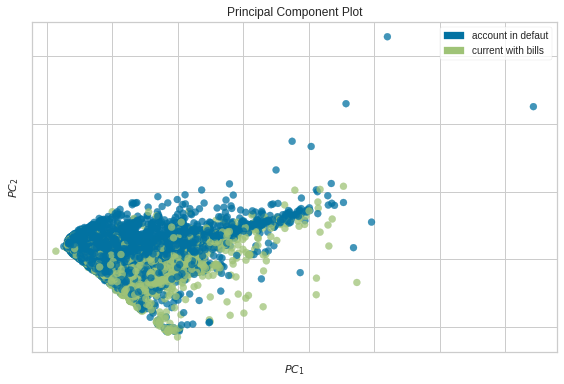

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

<IPython.core.display.Javascript object>

In [19]:
visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

[Link to Yellowbrick](https://www.scikit-yb.org/en/latest/)

### Visualize Feature Importances with Yellowbrick

In [ ]:
!pip install yellowbrick

Having more features is not always equivalent to a better model. The more features a model has, the more sensitive the model is to errors due to variance. Thus, we want to select the minimum required features to produce a valid model.

A common approach to eliminate features is to eliminate the ones that are the least important to the model. Then we re-evaluate if the model actually performs better during cross-validation.

Yellowbrick's `FeatureImportances` is ideal for this task since it helps us to visualize the relative importance of the features for the model.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

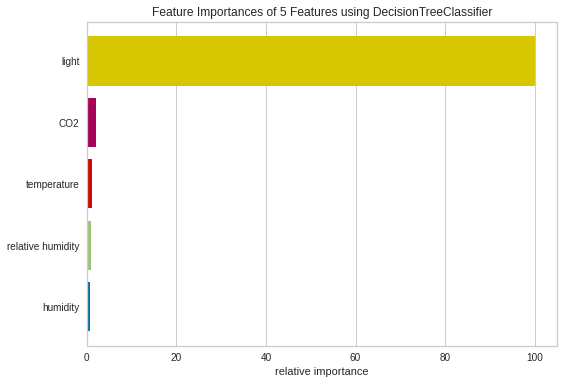

In [10]:
X, y = load_occupancy()

model = DecisionTreeClassifier()

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show();

From the plot above, it seems like the light is the most important feature to DecisionTreeClassifier, followed by CO2, temperature.


### Validation Curve: Determine if an Estimator is Underfitting over Overfitting

In [ ]:
!pip install yellowbrick

To determine if the estimator is underfitting or overfitting for different values of a hyperparameter, use Yellowbrick's validation curve.

The validation curve helps us to find the hyperparameter where the estimator is neither underfitting nor overfitting.

In [6]:
from yellowbrick.datasets.loaders import load_occupancy
from yellowbrick.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

import numpy as np 

In [5]:
# Load data
X, y = load_occupancy()

DecisionTreeClassifier()

In the code below, we choose the range of `max_depth` to be from 1 to 11.

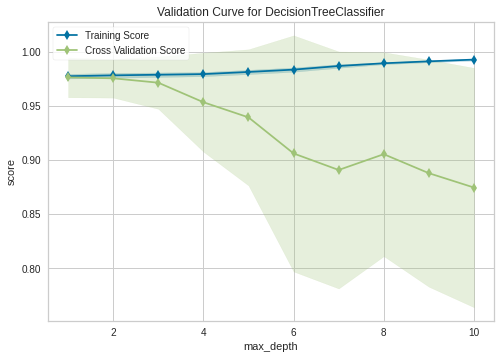

In [9]:
viz = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="f1",
)

As we can see from the plot above, although the number of max depth above 2 results in the higher training score, it also results in the lower cross-validation score. This is because the decision tree becomes more overfitting the deeper it is.

Thus, the sweet spot will be where the cross-validation score neither increases nor decreases, which is 2.

[Link to Yellowbrick](https://www.scikit-yb.org/en/latest/index.html).

[My full article about Yellowbrick](https://towardsdatascience.com/introduction-to-yellowbrick-a-python-library-to-explain-the-prediction-of-your-machine-learning-d63ecee10ecc).

### Mlxtend: Plot Decision Regions of Your ML Classifiers

In [ ]:
!pip install mlxtend  

How does your machine learning classifier decide which class a sample belongs to? Plotting a decision region can give you some insights into your ML classifier's decision.

An easy way to plot decision regions is to use mlxtend's `plot_decision_regions`.

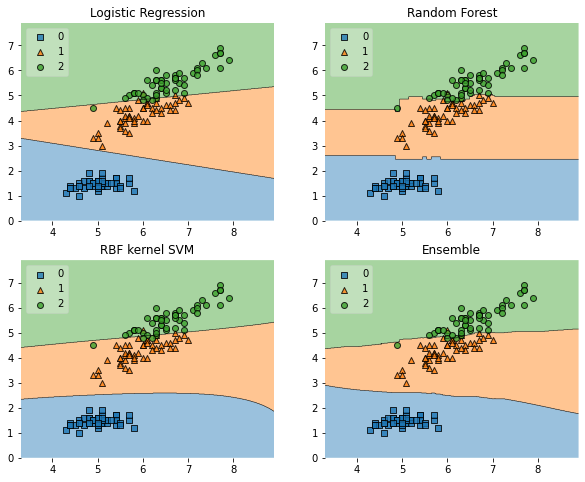

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks. 

Find other useful functionalities of Mlxtend [here](https://github.com/rasbt/mlxtend).

### Deepchecks + Weights & Biases: Test and Track Your ML Model and Data

In [ ]:
!pip install -U deepchecks wandb scikit-learn 

[Weight and Biases](https://towardsdatascience.com/introduction-to-weight-biases-track-and-visualize-your-machine-learning-experiments-in-3-lines-9c9553b0f99d) is a tool to track and monitor your ML experiments. [deepchecks](https://deepchecks.com/) is a tool that allows you to create test suites for your ML models & data with ease. 

The checks in a suite includes:
- model performance
- data integrity
- distribution mismatches
and more.

Now you can track deepchecks suite's results with Weights & Biases. 

To learn how to use this integration, start with loading a dataset and splitting it into train and test set.



In [1]:
import pandas as pd  
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from deepchecks import Dataset

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load Data
X, y = load_iris(as_frame=True, return_X_y=True)
label_col = 'target'

df = pd.concat([X, y.to_frame(name=label_col)], axis=1)

In [3]:
df_train, df_test = train_test_split(df, stratify=df[label_col], random_state=0)

Next, build a ML model using the training data. 

In [4]:
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col])

RandomForestClassifier()

Create deepchecks' Dataset objects with train and test set. 

In [5]:
ds_train = Dataset(df_train, label=label_col, cat_features=[])
ds_test =  Dataset(df_test,  label=label_col, cat_features=[])

Create a test suite using our ML model and datasets and run it.

In [6]:
from deepchecks.suites import full_suite

suite = full_suite()
suite_result = suite.run(ds_train, ds_test, rf_clf)

Full Suite:   0%|          | 0/36 [00:00<?, ? Check/s]

Export all results to Weights & Biases:

In [7]:
import wandb
wandb.login()

wandb: Currently logged in as: khuyentran1401 (use `wandb login --relogin` to force relogin)


True

In [8]:
suite_result.to_wandb() 

Full Suite:   0%|          | 0/52 [00:00<?, ? Check/s]

And this is how the test suite will look like in W&B.

![](../img/deepchecks_wandb.gif)

[My article about Weights & Biases](https://towardsdatascience.com/introduction-to-weight-biases-track-and-visualize-your-machine-learning-experiments-in-3-lines-9c9553b0f99d)

[Link to deepchecks](https://deepchecks.com/)